In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
trainset = pd.read_csv("data/train.csv")
testset = pd.read_csv("data/test.csv")

In [214]:
# Combine both sets for easier cleaning, will split later
dataset = pd.concat([trainset, testset], axis=0)
dataset.shape

(2919, 81)

In [215]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [216]:
# Get relevant columns and create new ones
selected_columns = ['Id', 'BedroomAbvGr', 'FullBath', 'HalfBath', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
relevantSet = dataset[selected_columns].copy()
relevantSet['SquareFootage'] = relevantSet['1stFlrSF'] + relevantSet['2ndFlrSF'] + relevantSet['TotalBsmtSF'] + relevantSet['GrLivArea']
relevantSet['TotalRooms'] = relevantSet['BedroomAbvGr'] + relevantSet['FullBath'] + relevantSet['HalfBath']


In [217]:
# Remove irrelevant columns
relevantSet = relevantSet[['Id', 'SquareFootage', 'TotalRooms', 'SalePrice']]

In [218]:
# Fill in the Sale price as 0 for now, for the test records and remove the null square footage records
cleanedSet = relevantSet.copy()
cleanedSet['SalePrice'] = cleanedSet['SalePrice'].fillna(0)
cleanedSet = cleanedSet.dropna()
cleanedSet['SquareFootage'] = cleanedSet['SquareFootage'].astype("int64")

In [219]:
cleanedSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2918 non-null   int64  
 1   SquareFootage  2918 non-null   int64  
 2   TotalRooms     2918 non-null   int64  
 3   SalePrice      2918 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 114.0 KB


C:\Users\saifa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


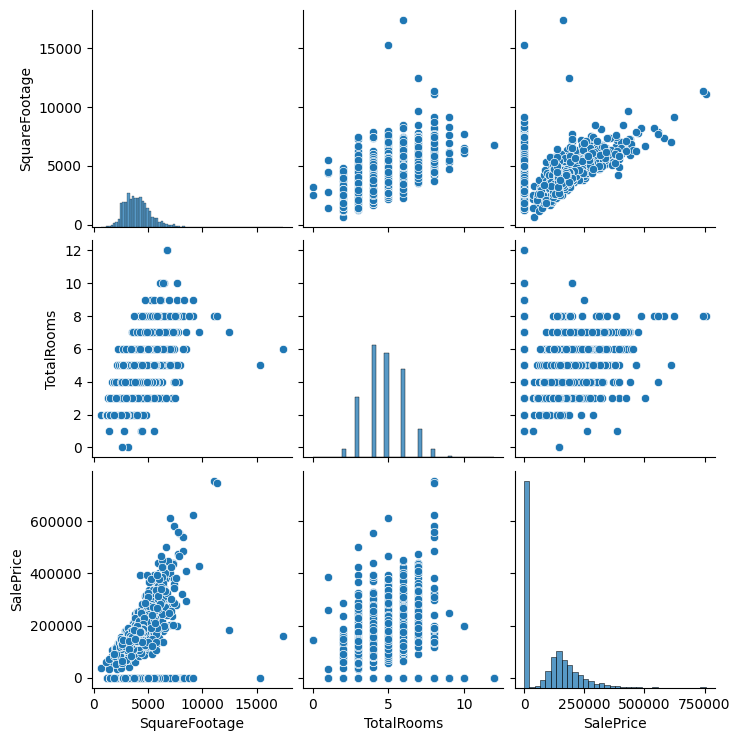

In [220]:
# Plotting to maybe find outliers
sns.pairplot(cleanedSet[['SquareFootage', 'TotalRooms', 'SalePrice']])

In [221]:
# Removed outliers
removedOutliers = cleanedSet[cleanedSet['SquareFootage'] < 12000]

C:\Users\saifa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


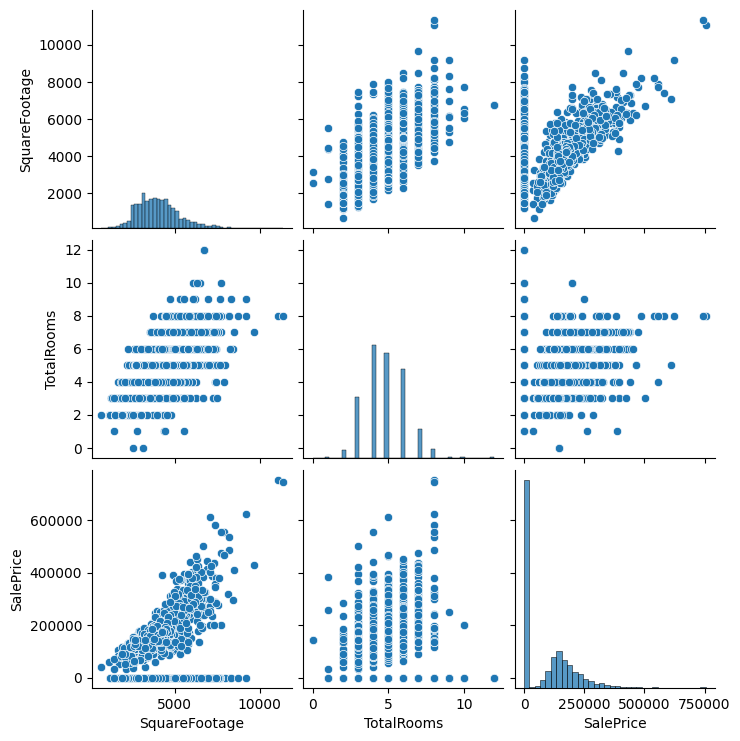

In [222]:
sns.pairplot(removedOutliers[['SquareFootage', 'TotalRooms', 'SalePrice']])

In [223]:
cleanDataset = removedOutliers[removedOutliers['SalePrice'] != 0]
cleanDataset.to_csv('data/cleanDataset.csv', index=False)
finalTestDataset = removedOutliers[removedOutliers['SalePrice'] == 0].drop(columns=['SalePrice'])
finalTestDataset.to_csv('data/finalTestDataset.csv', index=False)